In [1]:
import os
import rasterio as rio
import pandas as pd
import random
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
basepath = "/home/abetatos/Escritorio/TFM_Dataset/5.Preds/"
hs_path = "/home/abetatos/Escritorio/TFM_Dataset/3.Basedataset/HS/"

In [3]:
masking = "1684923533_model_57_012345678/"
masking1 = "1684923533_model_57_012345678_mask1/"

In [12]:
import pandas as pd

def get_slices(aux, precision): 
    df = pd.DataFrame(aux)
    df[0] = df[0].apply(lambda x: round(x, precision))
    arr = []
    for index, round_df in df.groupby(0):
        arr.append([index, round_df[1].mean()])
    return np.array(arr)

def plot_corr(mask_error, mask1_error, label, ax, show=False):
    grouped_me = list(zip(mask_error, mask1_error))
    grouped_me = get_slices(grouped_me, 1)

    random.shuffle(grouped_me)

    me_flat, me1_flat = np.array(list(zip(*grouped_me[:50000])))

    # xy = np.vstack([me_flat, me1_flat])
    # kernel = gaussian_kde(xy)(xy)
    print(me1_flat.max(), me1_flat.min())
    ax.scatter(me_flat, me1_flat, s=1, label=label) #c=kernel
    # ax.set_ylim(0, max(me_flat.max(), me1_flat.max()))
    ax.set_xlim(0, max(me_flat.max(), me1_flat.max()))
    # ax.set_ylim(0, me1_flat[me_flat < 2].max())
    # ax.set_xlim(0, 2)
    plt.xlabel("HS")
    plt.ylabel(label)
    if show:
        plt.legend()
        plt.show()

snowmap_20160309_ads_100_extent_maskiert_nosnow0_noausreisser
2.4046921730041504 0.501403272151947
4.455893039703369 1.7120922803878784


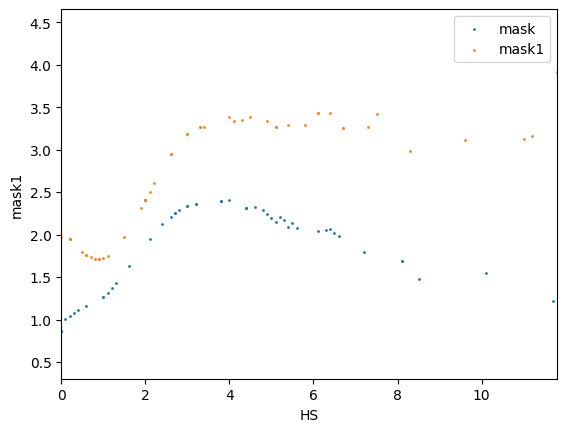

HS_Saflischpass_20220512_1m_epsg2056
3.312844753265381 0.8780098557472229
8.97314739227295 5.167375087738037


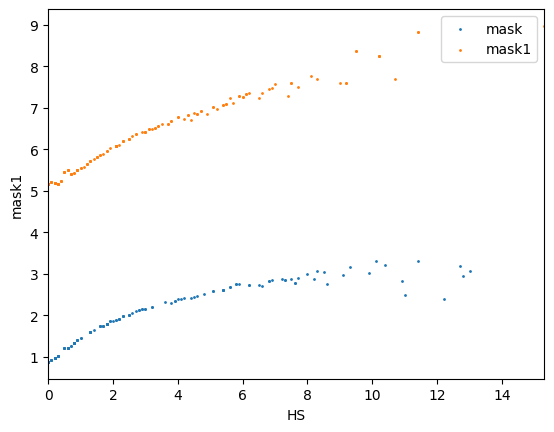

HS_Laucherenalp_20220511_1m_epsg2056
4.639492988586426 1.5547670125961304
7.915173053741455 3.2550671100616455


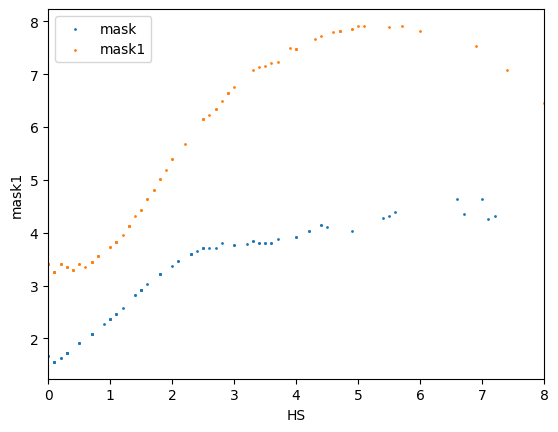

snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser
2.8414931297302246 0.5243350863456726
4.584383010864258 1.5342888832092285


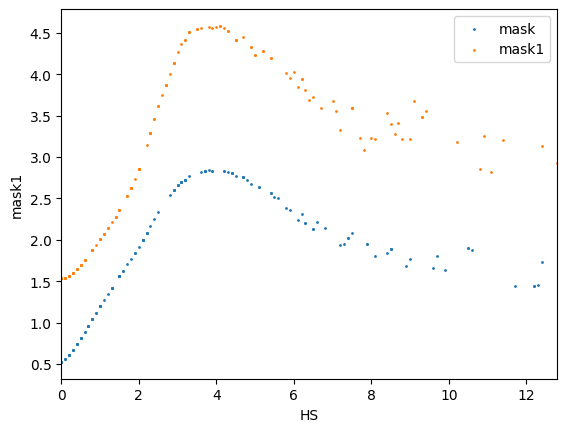

HS_Davos_20200406_2m_epsg2056
3.0410308837890625 0.6170363426208496
3.9805448055267334 1.219770908355713


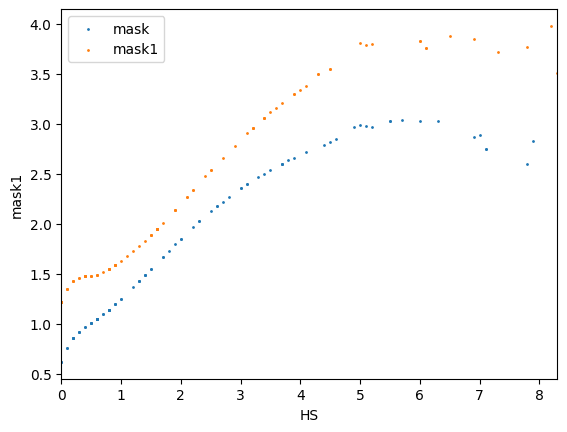

HS_Davos_20211604_2m_epsg2056
3.521540641784668 0.5269106030464172
4.123701095581055 1.1103595495224


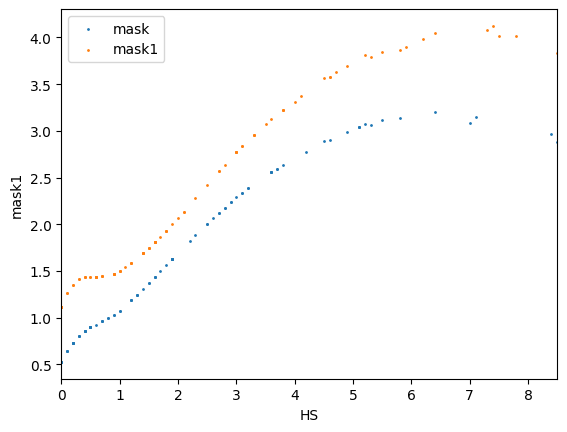

snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser
3.309692859649658 0.7493378520011902
4.643449306488037 1.5658642053604126


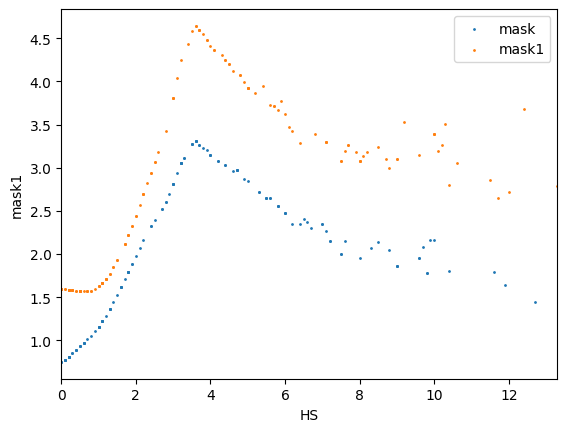

snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser
4.92741584777832 1.0013108253479004
5.889734745025635 1.681933879852295


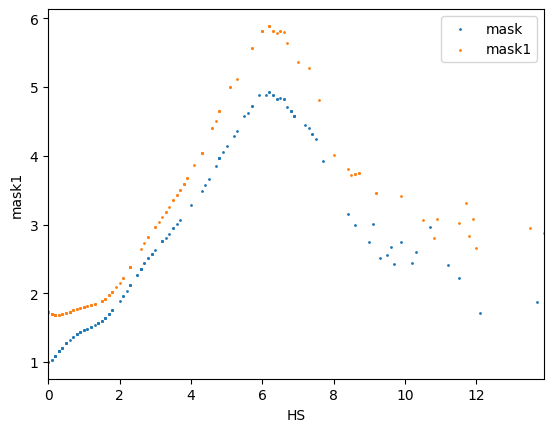

snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser
2.8037655353546143 0.5957808494567871
4.396320343017578 1.4844541549682617


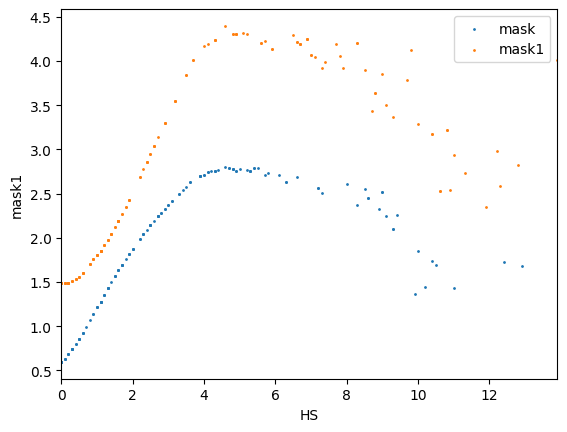

snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser
1.1350595951080322 0.4146563410758972
4.752295970916748 1.7654975652694702


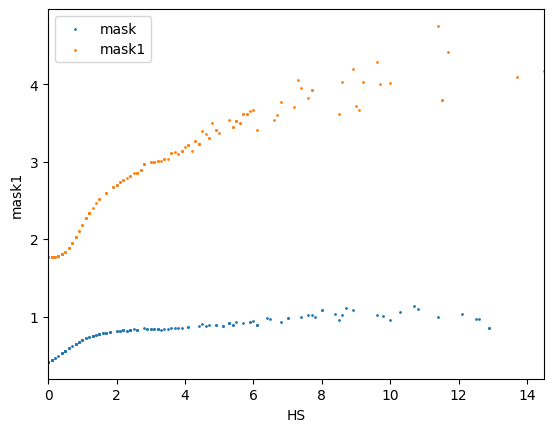

HS_c_20220223_1m_epsg2056
4.435694694519043 1.3172730207443237
8.573783874511719 4.276691913604736


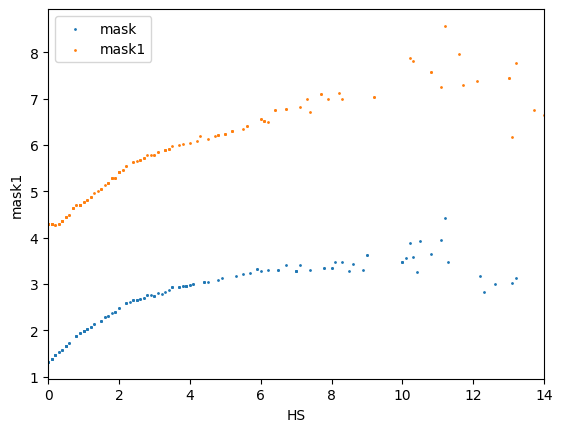

HS_Davos_20170316_2m_epsg2056
2.429744005203247 0.4938519299030304
4.17632532119751 1.259587049484253


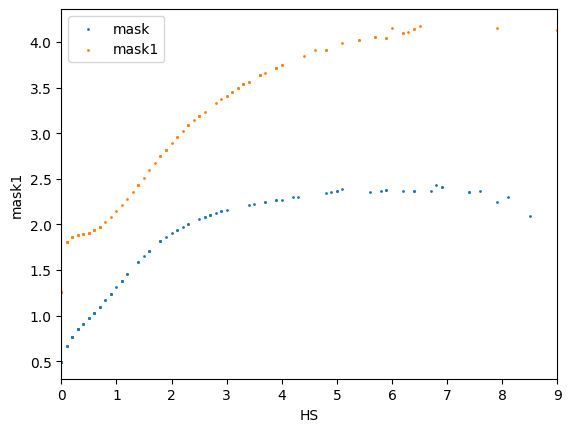

HS_Davos_20180411_2m_epsg2056
2.4107017517089844 0.7956154346466064
2.799529552459717 1.4796477556228638


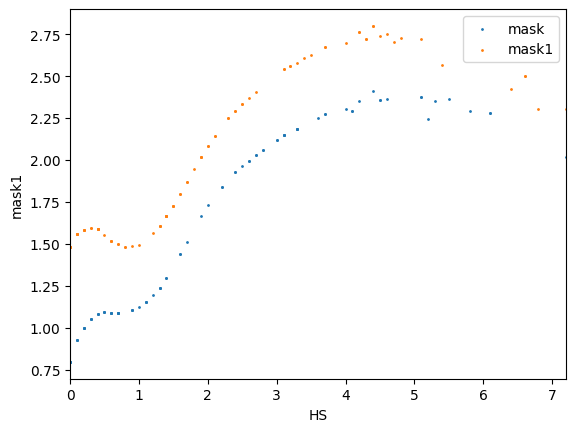

snowmap_20160420_ads_100_extent_maskiert_nosnow0_noausreisser
2.588712692260742 0.3796728551387787
4.7077107429504395 1.4605281352996826


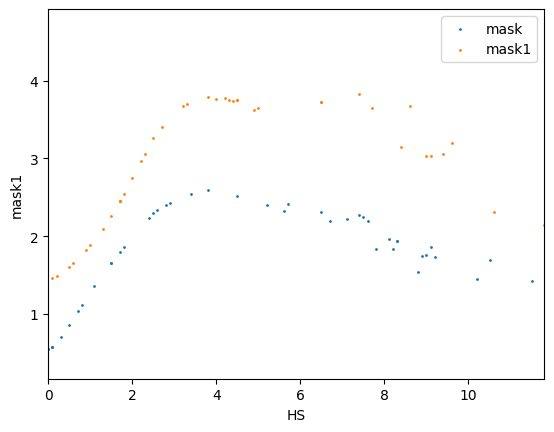

HS_Laucherenalp_20220224_2m_epsg2056
2.5026023387908936 0.37877875566482544
5.467355251312256 0.5823667645454407


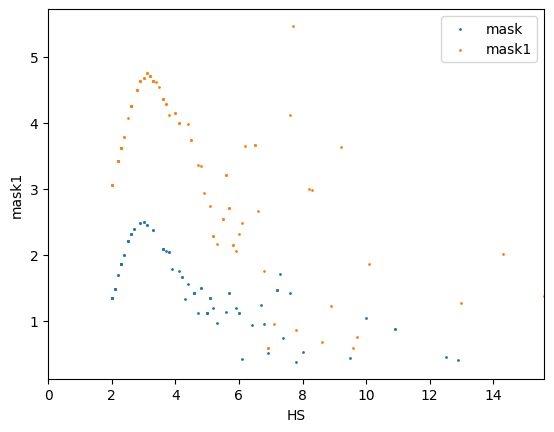

snowmap_2010_ads_80_extent_maskiert_nosnow0_noausreisser
5.026365280151367 0.5712602734565735
7.129693508148193 1.3405948877334595


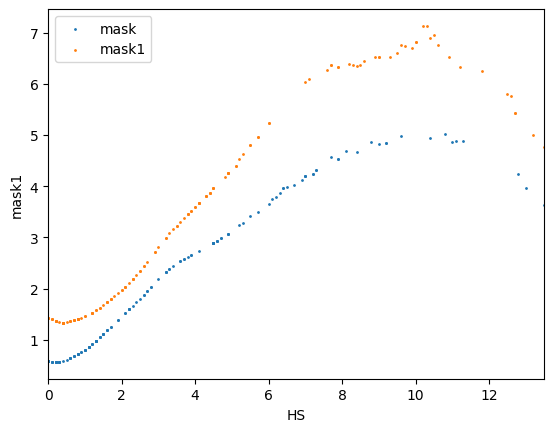

In [14]:
results = pd.DataFrame()
for location in os.listdir(basepath + masking):
    print(location)
    with rio.open(basepath + masking + location + "/HS_pred.tif", "r") as f: 
        masking_arr = f.read()
    with rio.open(basepath + masking1 + location + "/HS_pred.tif", "r") as f: 
        masking1_arr = f.read()

    with rio.open(hs_path + location + "/HS.tif", "r") as f: 
        hs = f.read()

    mask = (masking_arr!=-9999.) & (masking1_arr!=-9999.)
    mask_error = abs(masking_arr[mask])
    mask1_error = masking1_arr[mask]
    hs = hs[mask]

    fig, ax = plt.subplots()
    plot_corr(hs, mask_error, "mask", ax)
    plot_corr(hs, mask1_error, "mask1", ax, show=True)
    
    results.at[location, "mask"] = abs(mask_error).mean()
    results.at[location, "mask1"] = abs(mask1_error).mean()

In [15]:
print((results['mask1']-results['mask']).mean())
results.style.highlight_min(color = 'blue', 
                       axis = 1)

1.2211417444050312


,mask,mask1
snowmap_20160309_ads_100_extent_maskiert_nosnow0_noausreisser,1.377408,2.060733
HS_Saflischpass_20220512_1m_epsg2056,1.793267,6.022612
HS_Laucherenalp_20220511_1m_epsg2056,3.202701,5.333716
snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser,1.385670,2.336113
HS_Davos_20200406_2m_epsg2056,1.546665,1.964093
HS_Davos_20211604_2m_epsg2056,1.557665,2.009017
snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser,1.730112,2.295427
snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser,2.055113,2.398378
snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser,1.495551,2.197245
snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser,0.598431,2.005583
